In [ ]:
import numpy as np

### Setup

In [ ]:
!pip install gdown > /dev/null

class Files:
  def __init__(self):
    self.filenames = [
         'https://drive.google.com/uc?id=14Sfo1858ifm9y-aPLrrvM6hHlkH8y3df',
         'https://drive.google.com/uc?id=1HXaD1pSOfBkn06nT4OSThmq9C_gk_Gr3',
         'https://drive.google.com/uc?id=1BcZYXr9XEehIJvJpMSlnZP6Leq81wtKa'
    ]

    self.paths = [None] * len(self.filenames)

    self.dir = './waterlinked_data/'
    req_dir = self.dir
    !mkdir -p $req_dir

  def __getitem__(self, i):  # -> FileLike
    if not (0 <= i < len(self.filenames)):
      raise IndexError(f"Invalid file test index. Index must be between [0, {len(self.filenames)}")
    
    if self.paths[i] is not None:
      return self.paths[i]
    
    req_file = self.filenames[i]
    !gdown $req_file
    req_dir = self.dir
    req_filename = f'230921_{i+1}.csv'
    !mv $req_filename $req_dir
    self.paths[i] = req_dir + req_filename

    return self.paths[i]

  def __len__(self):
    return self.filenames.__len__()

files = Files()

In [ ]:
class TimeConverter:
  def __init__(self, start_time=None):
    self.start_time = start_time
  
  def __call__(self, val: str) -> float:
    cmp = val.decode('UTF-8').split(':')
    assert(len(cmp) == 4)
    float_cmps = list(map(np.float, cmp))
    time = float_cmps[0] * 3600 + float_cmps[1] + float_cmps[2] + 0.001 * float_cmps[3]

    if self.start_time is None:
      self.start_time = time

    return time - self.start_time

In [ ]:
def load_run(i: int):
  tc = TimeConverter()
  return np.loadtxt(files[i], delimiter=',', usecols=(1,2,3,4,), dtype=np.float, 
            converters={1:tc, 2:np.float,3:np.float,4:np.float}
            )

### Test Loaders

In [ ]:
run_data = load_run(0)
run_data

Downloading...
From: https://drive.google.com/uc?id=14Sfo1858ifm9y-aPLrrvM6hHlkH8y3df
To: /content/230921_1.csv
100% 72.6k/72.6k [00:00<00:00, 26.3MB/s]


array([[ 0.        ,  4.39451122,  1.38929737,  0.5       ],
       [ 0.226     ,  4.39451122,  1.38929737,  0.5       ],
       [ 0.451     ,  4.39451122,  1.38929737,  0.5       ],
       ...,
       [12.907     ,  4.58192158,  2.34173846,  0.5       ],
       [13.144     ,  4.58096886,  2.34693813,  0.5       ],
       [13.375     ,  4.58096886,  2.34693813,  0.5       ]])

In [ ]:
import matplotlib.pyplot as plt

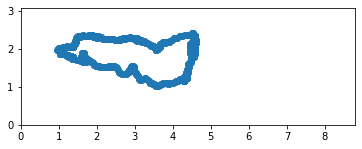

In [ ]:
plt.gca().set_aspect('equal', adjustable='box')
plt.scatter(run_data[:,1], run_data[:,2])
plt.xlim(0, 8.8)
plt.ylim(0, 3.06)
plt.show()

In [ ]:
run_data = load_run(1)
run_data

Downloading...
From: https://drive.google.com/uc?id=1HXaD1pSOfBkn06nT4OSThmq9C_gk_Gr3
To: /content/230921_2.csv
100% 21.7k/21.7k [00:00<00:00, 31.6MB/s]


array([[ 0.        ,  4.63432884,  2.32717347,  0.5       ],
       [ 0.53      ,  4.62553549,  2.30268168,  0.5       ],
       [ 1.065     ,  4.62014484,  2.30868244,  0.5       ],
       ...,
       [-6.08      ,  4.4474721 ,  2.41264391,  0.5       ],
       [-5.548     ,  4.44553614,  2.4106946 ,  0.5       ],
       [-5.018     ,  4.44992399,  2.3956008 ,  0.5       ]])

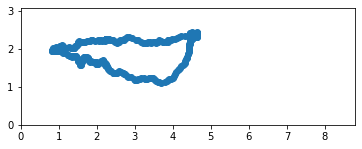

In [ ]:
plt.gca().set_aspect('equal', adjustable='box')
plt.scatter(run_data[:,1], run_data[:,2])
plt.xlim(0, 8.8)
plt.ylim(0, 3.06)
plt.show()

In [ ]:
run_data = load_run(2)
run_data

Downloading...
From: https://drive.google.com/uc?id=1BcZYXr9XEehIJvJpMSlnZP6Leq81wtKa
To: /content/230921_3.csv
100% 18.5k/18.5k [00:00<00:00, 27.4MB/s]


array([[ 0.        ,  4.48721886,  2.3447156 ,  0.5       ],
       [ 0.526     ,  4.48975611,  2.36061263,  0.5       ],
       [ 1.057     ,  4.48801899,  2.35376787,  0.5       ],
       ...,
       [27.865     ,  4.53007174,  2.37622547,  0.5       ],
       [28.391     ,  4.52336836,  2.37632322,  0.5       ],
       [28.92      ,  4.5225668 ,  2.35549235,  0.5       ]])

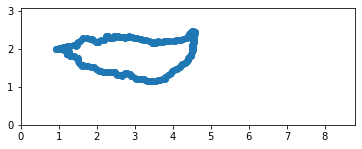

In [ ]:
plt.gca().set_aspect('equal', adjustable='box')
plt.scatter(run_data[:,1], run_data[:,2])
plt.xlim(0, 8.8)
plt.ylim(0, 3.06)
plt.show()

### Combined Plot

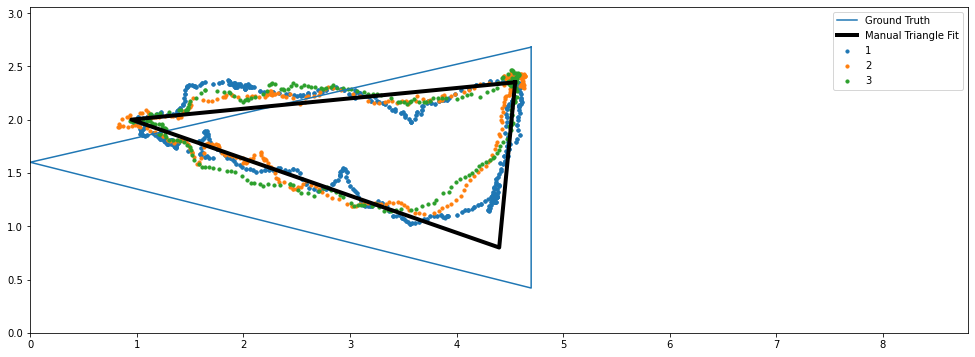

In [ ]:
plt.figure(figsize=(18,6))
plt.gca().set_aspect('equal', adjustable='box')
plt.xlim(0, 8.8)
plt.ylim(0, 3.06)

run_data = load_run(0)
plt.scatter(run_data[:,1], run_data[:,2], label="1", s=10)

run_data = load_run(1)
plt.scatter(run_data[:,1], run_data[:,2], label="2", s=10)

run_data = load_run(2)
plt.scatter(run_data[:,1], run_data[:,2], label="3", s=10)


plt.plot(*zip([4.7, 2.68], [0, 1.6], [4.7, 0.42], [4.7, 2.68]), label="Ground Truth")
plt.plot(*zip([4.55, 2.35], [0.95, 2.00], [4.4, 0.8], [4.55, 2.35]), label="Manual Triangle Fit", color="Black", linewidth=4)

plt.legend()
plt.show()

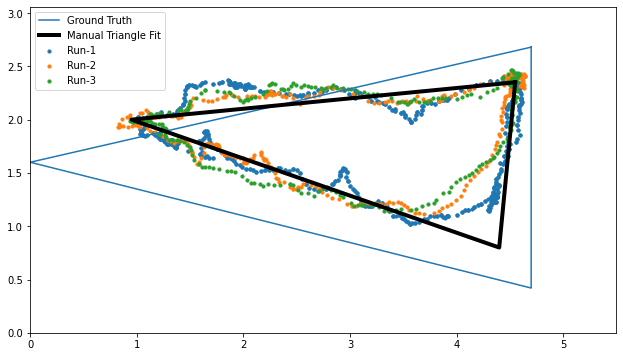

In [ ]:
plt.figure(figsize=(18,6))
plt.gca().set_aspect('equal', adjustable='box')
plt.xlim(0, 5.5)
plt.ylim(0, 3.06)

run_data = load_run(0)
plt.scatter(run_data[:,1], run_data[:,2], label="Run-1", s=10)

run_data = load_run(1)
plt.scatter(run_data[:,1], run_data[:,2], label="Run-2", s=10)

run_data = load_run(2)
plt.scatter(run_data[:,1], run_data[:,2], label="Run-3", s=10)


plt.plot(*zip([4.7, 2.68], [0, 1.6], [4.7, 0.42], [4.7, 2.68]), label="Ground Truth")
plt.plot(*zip([4.55, 2.35], [0.95, 2.00], [4.4, 0.8], [4.55, 2.35]), label="Manual Triangle Fit", color="Black", linewidth=4)

plt.legend()
plt.show()

# Analysis - Get error with triangle

In [ ]:
!pip install gdown > /dev/null

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

### Reader Code

In [ ]:
class TimeConverter:
  def __init__(self, start_time=None):
    self.start_time = start_time
  
  def __call__(self, val: str) -> float:
    cmp = val.decode('UTF-8').split(':')
    assert(len(cmp) == 4)
    float_cmps = list(map(np.float, cmp))
    time = float_cmps[0] * 3600 + float_cmps[1] + float_cmps[2] + 0.001 * float_cmps[3]

    if self.start_time is None:
      self.start_time = time

    return time - self.start_time

class Files:
  def __init__(self):
    self.filenames = [
         'https://drive.google.com/uc?id=14Sfo1858ifm9y-aPLrrvM6hHlkH8y3df',
         'https://drive.google.com/uc?id=1HXaD1pSOfBkn06nT4OSThmq9C_gk_Gr3',
         'https://drive.google.com/uc?id=1BcZYXr9XEehIJvJpMSlnZP6Leq81wtKa'
    ]

    self.paths = [None] * len(self.filenames)

    self.data = [None] * len(self.filenames)

    self.start_times = [None] * len(self.filenames)

    self.dir = './waterlinked_data/'
    req_dir = self.dir
    !mkdir -p $req_dir

  def __getitem__(self, i):  # -> FileLike
    if not (0 <= i < len(self.filenames)):
      raise IndexError(f"Invalid file test index. Index must be between [0, {len(self.filenames)}")
    
    if self.data[i] is not None:
      return self.data[i]
    
    req_file = self.filenames[i]
    !gdown $req_file
    req_dir = self.dir
    req_filename = f'230921_{i+1}.csv'
    !mv $req_filename $req_dir
    self.paths[i] = req_dir + req_filename

    tc = TimeConverter()
    self.data[i] = np.loadtxt(self.paths[i], delimiter=',', usecols=(1,2,3,4,), dtype=np.float, 
            converters={1:tc, 2:np.float,3:np.float,4:np.float}
            )
    
    self.start_times[i] = tc.start_time

    self.data[i].flags.writeable = False

    return self.data[i]

  def __len__(self):
    return self.filenames.__len__()

files = Files()

## Basic Visualization

Downloading...
From: https://drive.google.com/uc?id=14Sfo1858ifm9y-aPLrrvM6hHlkH8y3df
To: /content/230921_1.csv
100% 72.6k/72.6k [00:00<00:00, 1.15MB/s]
Downloading...
From: https://drive.google.com/uc?id=1HXaD1pSOfBkn06nT4OSThmq9C_gk_Gr3
To: /content/230921_2.csv
100% 21.7k/21.7k [00:00<00:00, 698kB/s]
Downloading...
From: https://drive.google.com/uc?id=1BcZYXr9XEehIJvJpMSlnZP6Leq81wtKa
To: /content/230921_3.csv
100% 18.5k/18.5k [00:00<00:00, 6.70MB/s]


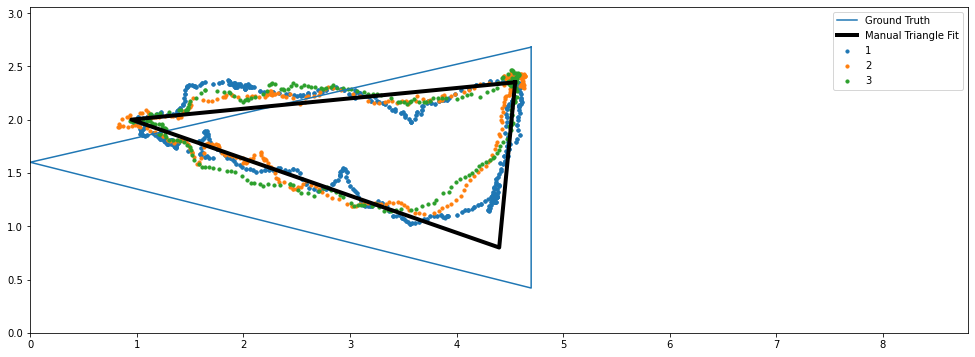

In [ ]:
plt.figure(figsize=(18,6))
plt.gca().set_aspect('equal', adjustable='box')
plt.xlim(0, 8.8)
plt.ylim(0, 3.06)

for i, f in enumerate(files):
  plt.scatter(f[:,1], f[:,2], label=f"{i+1}", s=10)

plt.plot(*zip([4.7, 2.68], [0, 1.6], [4.7, 0.42], [4.7, 2.68]), label="Ground Truth")
plt.plot(*zip([4.55, 2.35], [0.95, 2.00], [4.4, 0.8], [4.55, 2.35]), label="Manual Triangle Fit", color="Black", linewidth=4)

plt.legend()
plt.show()

In [ ]:
class Triangle:
  def __init__(self, pts):
    self.pts = np.array(pts)
    assert(pts.shape == (3, 2))

    self.lines = np.zeros((3,3))
    p = self.pts
    
    # L * x + M * y - K = 0 : L**2 + M**2 = 1, L * (Ax) + M*Ay - K < 0
    
    # Find perpendicular vectors
    # TODO: Less 1/foo, multiply it out
    self.lines[0, 0] = (1 / p[1,1] - 1 / p[2,1]) / (p[1,0] / p[1,1] - p[2,0] / p[2,1])
    self.lines[0, 1] = (1 / p[1,0] - 1 / p[2,0]) / (p[1,1] / p[1,0] - p[2,1] / p[2,0])

    self.lines[1, 0] = (1 / p[2,1] - 1 / p[0,1]) / (p[2,0] / p[2,1] - p[0,0] / p[0,1])
    self.lines[1, 1] = (1 / p[2,0] - 1 / p[0,0]) / (p[2,1] / p[2,0] - p[0,1] / p[0,0])

    self.lines[2, 0] = (1 / p[0,1] - 1 / p[1,1]) / (p[0,0] / p[0,1] - p[1,0] / p[1,1])
    self.lines[2, 1] = (1 / p[0,0] - 1 / p[1,0]) / (p[0,1] / p[0,0] - p[1,1] / p[1,0])

    # Normalize perpendicular vectors
    z = np.sqrt(self.lines[:,0]**2 + self.lines[:,1]**2)
    self.lines[:, 0] /= z
    self.lines[:, 1] /= z
    self.lines[:, 2] = 1.0 / z

    # The L(vertex) should be -ive
    dir = (-2 * ((np.sum(self.lines[:,0:2] * self.pts, axis=1) - self.lines[:, 2] > 0) - 0.5)).astype(np.int)
    self.lines *= dir[:, None]
  
  def get_dist(self, x, y):
    dists = self.lines[:,0] * x + self.lines[:, 1] * y - self.lines[:, 2]
    if np.sum(dists <= 0) == 3:
      # Interior point:
      return np.min(-1 * dists)
    if np.sum(dists < 0) == 1:
      id = np.where(dists < 0)[0][0]
      return np.linalg.norm(self.pts[id] - (x,y))

    if np.sum(dists > 0) == 1:
      return dists[np.where(dists > 0)[0][0]]

    print(x,y,dists)
    raise Exception()

    
    # 1/2[x1(y2 - y3) + x2(y3 - y1) + x3(y1 - y2)]

In [ ]:
t = Triangle(p)

NameError: ignored

In [ ]:
plt.plot(*(np.hstack((t.pts.T, t.pts.T[:, 0:1],))), 'o-')
plt.plot

In [ ]:
t.get_dist(0,0)

In [ ]:
x = np.linspace(0, 4, 10)
y = np.linspace(1, 6, 10)
x,y = np.meshgrid(x,y)

In [ ]:
d= np.empty_like(x).astype(np.float)
d[:, :] = t.get_dist(x,y)

In [ ]:
plt.quiver(*t.lines[:, 0:2].T)

In [ ]:
x, y = 2.75, 5
t.lines[:,0] *x + t.lines[:, 1] * y - t.lines[:, 2]

In [ ]:
x, y = 1.5,4
t.lines[:,0] *x + t.lines[:, 1] * y - t.lines[:, 2]

In [ ]:
x, y = 2,3.5
t.lines[:,0] *x + t.lines[:, 1] * y - t.lines[:, 2]

In [ ]:
x, y = 4,4
t.lines[:,0] *x + t.lines[:, 1] * y - t.lines[:, 2]